# Large Language Models (LLMs)

Large Language Models (LLMs) are a core component of LangChain. LangChain does not serve its own LLMs, but rather provides a standard interface for interacting with many different LLMs. To be specific, this interface is one that takes as input a string and returns a string.

## LLM setup

In [5]:
import os
from getpass import getpass
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain_openai import AzureChatOpenAI, AzureOpenAIEmbeddings
from langchain_core.messages import HumanMessage, SystemMessage
from dotenv import load_dotenv

In [ ]:
prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

print(prompt.format(product="podcast player"))

### Azure OpenAI

Azure OpenAI Service provides REST API access to OpenAI’s powerful language models including the GPT-4, GPT-3.5-Turbo, and Embeddings model series.

In [9]:
import os
from langchain_core.messages import HumanMessage
from langchain_openai import AzureChatOpenAI

#### Past keys

In [ ]:
os.environ["AZURE_OPENAI_API_KEY"] = getpass("Enter your OpenAI API Key: ")
os.environ["AZURE_OPENAI_ENDPOINT"] = getpass("Enter your Astra DB API Endpoint: ")

#### Load keys

In [ ]:
load_dotenv()

In [11]:
llm = AzureChatOpenAI(
    openai_api_version="2023-05-15",
    azure_deployment="gpt-4",
)

In [17]:
message = HumanMessage(
    content="Translate this sentence from English to French. I love programming."
)
response = llm([message])

In [25]:
print(response.content)

J'aime la programmation.


### Google Cloud Vetex AI

In [6]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_vertexai import ChatVertexAI

In [7]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = getpass("Enter your Google Application Credentials (JSON): ")

In [ ]:
system = "You are a helpful assistant who translate English to French"
human = "Translate this sentence from English to French. I love programming."
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

chat = ChatVertexAI()

chain = prompt | chat
chain.invoke({})

### Huggingface

To instantiate a Hugging Face LLM there are three options available

* HuggingFaceTextGenInference
* HuggingFaceEndpoint
* HuggingFaceHub

In [ ]:
import os
from langchain_community.llms import HuggingFaceTextGenInference

### Ollama

Ollama allows you to run open-source large language models, such as Google's Gemma, LlaMA 2 or Mistral locally. Ollama supports importing [models](https://ollama.com/library) in GGUF format (GPT-Generated Unified Format). Ollama bundles model weights, configuration, and data into a single package, defined by a Modelfile. It optimizes setup and configuration details, including CPU and GPU usage.

#### Gemma7B

Gemma is a family of lightweight, state-of-the-art open models built by Google DeepMind. It’s inspired by Gemini models at Google.
Gemma is available in both 2b and 7b parameter sizes. The models undergo training on a diverse dataset of web documents to expose them to a wide range of linguistic styles, topics, and vocabularies. This includes code to learn syntax and patterns of programming languages, as well as mathematical text to grasp logical reasoning.
To ensure the safety of the model, the team employed various data cleaning and filtering techniques, including rigorous filtering for CSAM (child sexual abuse material), sensitive data filtering, and filtering based on content quality in compliance with Google’s policies.

In [15]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

llm = ChatOllama(base_url="http://localhost:11434", model="gemma:7b")
prompt = ChatPromptTemplate.from_template("Tell me a short joke about {topic}")
chain = prompt | llm | StrOutputParser()
topic = {"topic": "Artificial Intelligence"}

print(chain.invoke(topic))

Why did the AI scientist cross the road?

To get to the other algorithm side.


In [17]:
from langchain.chat_models import ChatOllama
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.schema import HumanMessage

llm = ChatOllama(model="gemma:7b", base_url = "http://localhost:11434", callback_manager = CallbackManager([StreamingStdOutCallbackHandler()]))

messages = [
    HumanMessage(content="Why is the sky blue?")
]
llm(messages)

The sky appears blue due to a phenomenon called **Rayleigh Scattering**. Here's the breakdown:

1. **Sunlight:** The sun emits all colors of the rainbow, including blue light.
2. **Scattering:** When sunlight enters Earth's atmosphere, particles like nitrogen and oxygen scatter the different colors of light in all directions.
3. **Blue Scatter:** Blue light scatters more effectively than other colors because it has shorter wavelengths.
4. **Scattered Light:** Scattered light travels in all directions, but the scattered light that reaches our eyes is mainly from the direction opposite the sun.
5. **Sky Color:** As a result, we see the sky as blue because the scattered light from all directions, including the direction opposite the sun, combines to create a blue hue.

**Additional factors:**

* **Time of Day:** The intensity of the blue color is strongest when the sun is high in the sky, around noon. It is fainter at sunrise and sunset because the sun's rays have to travel through a grea

AIMessage(content="The sky appears blue due to a phenomenon called **Rayleigh Scattering**. Here's the breakdown:\n\n1. **Sunlight:** The sun emits all colors of the rainbow, including blue light.\n2. **Scattering:** When sunlight enters Earth's atmosphere, particles like nitrogen and oxygen scatter the different colors of light in all directions.\n3. **Blue Scatter:** Blue light scatters more effectively than other colors because it has shorter wavelengths.\n4. **Scattered Light:** Scattered light travels in all directions, but the scattered light that reaches our eyes is mainly from the direction opposite the sun.\n5. **Sky Color:** As a result, we see the sky as blue because the scattered light from all directions, including the direction opposite the sun, combines to create a blue hue.\n\n**Additional factors:**\n\n* **Time of Day:** The intensity of the blue color is strongest when the sun is high in the sky, around noon. It is fainter at sunrise and sunset because the sun's rays 

In [18]:
from langchain.chat_models import ChatOllama
from langchain.prompts import PromptTemplate
from IPython.display import display, Markdown
from langchain.chains import LLMChain

llm = ChatOllama(model="gemma:7b", base_url = "http://localhost:11434")

prompt_template = PromptTemplate.from_template(
    "Why is the {topic} {color}."
)

prompt = prompt_template.format(topic="car", color="red")

print(prompt)

Why is the car red.


In [19]:
chain = LLMChain(llm=llm, prompt=prompt_template)
result = chain.run(topic="sky", color="blue")
display(Markdown(result))

/Users/ramon.wartala/Documents/source/conversational-apps-with-langchain/.venv/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


The sky appears blue due to a phenomenon called **Rayleigh Scattering**.

**Rayleigh Scattering:**

* When sunlight hits the Earth's atmosphere, it interacts with the particles of air, primarily nitrogen and oxygen molecules.
* These particles scatter the sunlight in all directions.
* However, the scattering of different wavelengths of light (colors) is not uniform.
* Shorter wavelengths (blue light) are scattered more effectively than longer wavelengths (red and orange light).
* The scattered blue light is scattered in all directions, including our eyes.

**Blue Sky:**

* When we look up at the sky, the scattered blue light from various directions converges on our eyes.
* This is why we perceive the sky as blue.

**Other Factors:**

* The intensity of blue color is greatest at noon and decreases as the sun moves closer to the horizon.
* The amount of scattering depends on the amount of air between the sun and the observer.
* That's why the sky is often seen as greener or bluer near the horizon.

**Additional Notes:**

* The phenomenon of Rayleigh scattering is also responsible for the blue color of the ocean and the white appearance of the sun.
* The scattering of light by particles in the atmosphere is a fundamental property of light and has been extensively studied in physics.

#### Mistral7B

[Mistral is a 7.3B](https://mistral.ai/news/announcing-mistral-7b/) parameter model, distributed with the Apache license. It is available in both instruct (instruction following) and text completion. The Mistral AI team has noted that Mistral 7B:

* Outperforms Llama 2 13B on all benchmarks
* Outperforms Llama 1 34B on many benchmarks
* Approaches CodeLlama 7B performance on code, while remaining good at English tasks

Mistral7B can easy deploy in the cloud (AWS/GCP/Azure) using [vLLM](https://docs.mistral.ai/self-deployment/skypilot/) or locally via Ollama. 

### Multi-modal with LlaVA

[LLaVA](https://llava-vl.github.io) is a multimodal model that combines a vision encoder and Vicuna for general-purpose visual and language understanding, achieving impressive chat capabilities mimicking spirits of the multimodal GPT-4. LLaVA 1.6 supporting 672x672, 336x1344, 1344x336 resolutions, a better visual reasoning and OCR capability with an improved visual instruction tuning data mixture.

In [20]:
import base64
from io import BytesIO
from PIL import Image
from datetime import datetime
from IPython.display import HTML, display
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage

In [21]:
def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]

def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


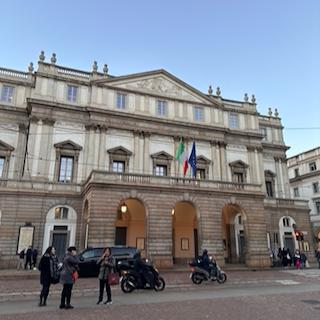

In [22]:
file_path = "../assets/teatro-alla-scala.jpeg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [24]:
llm = ChatOllama(base_url="http://localhost:11434", model="llava:v1.6", temperature=0)

chain = prompt_func | llm | StrOutputParser()

start_time = datetime.now()
query_chain = chain.invoke(
    {"text": "What is on this image?", "image": image_b64}
)

display(Markdown(query_chain))
#print(query_chain)

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

 The image shows a building with classical architectural features, such as columns and a pediment. There is a flag on the facade of the building, which appears to be an Italian flag due to its design. In front of the building, there are people standing around, suggesting that this might be a public space or a location where an event is taking place. The sky is clear, indicating it's likely daytime. There are no visible texts or distinctive brands in the image. 

Time elapsed (hh:mm:ss.ms) 0:00:14.214540


## Temperature

## Tracking token usage

Read more about token counting https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb

In [27]:
import tiktoken

# load the right encoding model for the LLM
encoding = tiktoken.encoding_for_model("gpt-4")

In [29]:
tokens = encoding.encode("Why is the sky blue?")

In [30]:
tokens

[10445, 374, 279, 13180, 6437, 30]

In [33]:
len(tokens)

6

In [37]:
from langchain.callbacks import get_openai_callback

In [45]:
# without specifying the model version, flat-rate 0.002 USD per 1k input and output tokens is used

with get_openai_callback() as cb:
    chain = LLMChain(llm=llm, prompt=prompt_template)
    result = chain.run(topic="sky", color="blue")
    print(
        f"Total Cost (EUR): €{format(cb.total_cost * 0.94 , '.6f')}"
    )  

Total Cost (EUR): €0.006627


## LangChain Expression Language (LCEL)

LangChain Expression Language, or LCEL, is a declarative way to easily compose chains together. LCEL was designed from day 1 to support putting prototypes in production, with no code changes, from the simplest “prompt + LLM” chain to the most complex chains. The why is shown here: https://python.langchain.com/docs/expression_language/why/

In [47]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [46]:
prompt = ChatPromptTemplate.from_template("tell me a short joke about {topic}")
output_parser = StrOutputParser()

In [48]:
# Notice this line of the code, where we piece together these different components into a single chain using LCEL:
chain = prompt | llm | output_parser

"Why don't ice creams ever get into arguments?\n\nBecause they always stay cool!"

In [50]:
result = chain.invoke({"topic": "ice cream"})
display(Markdown(result))

Why don't ice creams ever get invited to parties?

Because they always bring a melt-down!